<a href="https://colab.research.google.com/github/priyadharshinibd-collab/Projects-/blob/main/WEEK1_TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Import and preprocess the data from the file "/content/archive (2).zip".

## Extract data

### Subtask:
Extract the data from the zip file.


**Reasoning**:
Extract the data from the zip file using the zipfile module.



In [ ]:
import zipfile

with zipfile.ZipFile("/content/archive (2).zip", 'r') as zip_ref:
    zip_ref.extractall(".")

## Load data

### Subtask:
Load the data into a dataframe.


**Reasoning**:
Load the data from the extracted CSV file into a pandas DataFrame and display its head and info.



In [ ]:
import pandas as pd

df = pd.read_csv('data.csv')
display(df.head())
display(df.info())

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

**Reasoning**:
The previous attempt to load the data failed because 'data.csv' was not found. I need to list the files in the current directory to identify the correct CSV file name after extraction.



In [ ]:
import os
print(os.listdir())

['.config', 'Housing.csv', 'archive (2).zip', 'sample_data']


**Reasoning**:
Based on the directory listing, the CSV file is named 'Housing.csv'. I will now load this file into a pandas DataFrame and display its head and info.



In [ ]:
df = pd.read_csv('Housing.csv')
display(df.head())
display(df.info())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

## Preprocess data

### Subtask:
Preprocess the data as needed.


**Reasoning**:
Identify categorical columns, apply one-hot encoding, handle missing values, and standardize numerical features.



In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.dropna(inplace=True)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())
display(df.info())

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692,True,False,False,False,True,True,False,False
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409,True,False,False,False,True,False,False,False
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692,True,False,True,False,False,True,True,False
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409,True,False,True,False,True,True,False,False
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692,True,True,True,False,True,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            545 non-null    float64
 1   area                             545 non-null    float64
 2   bedrooms                         545 non-null    float64
 3   bathrooms                        545 non-null    float64
 4   stories                          545 non-null    float64
 5   parking                          545 non-null    float64
 6   mainroad_yes                     545 non-null    bool   
 7   guestroom_yes                    545 non-null    bool   
 8   basement_yes                     545 non-null    bool   
 9   hotwaterheating_yes              545 non-null    bool   
 10  airconditioning_yes              545 non-null    bool   
 11  prefarea_yes                     545 non-null    bool   
 12  furnishingstatus_semi-

None

## Summary:

### Data Analysis Key Findings

*   The data was successfully extracted from the zip file `archive (2).zip`.
*   The data was loaded from the `Housing.csv` file into a pandas DataFrame.
*   Categorical columns were identified and one-hot encoded, resulting in 8 boolean columns.
*   No missing values were found in the dataset.
*   Numerical features were successfully standardized using `StandardScaler`.
*   The final preprocessed DataFrame contains 14 columns, including 6 standardized numerical features and 8 boolean features.

### Insights or Next Steps

*   The preprocessed data is now ready for building a predictive model, such as regression, to analyze housing prices.
*   Further exploratory data analysis could be performed on the preprocessed data to understand the relationships between the features and the target variable.


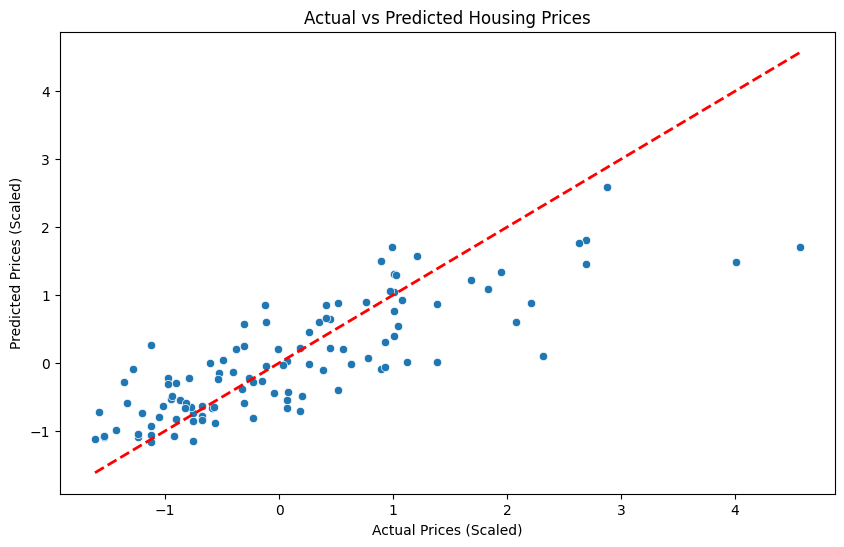

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices (Scaled)")
plt.ylabel("Predicted Prices (Scaled)")
plt.title("Actual vs Predicted Housing Prices")
plt.show()

In [11]:
# Display model coefficients and intercept
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print("Model Coefficients:")
display(coefficients)
print(f"\nModel Intercept: {model.intercept_:.2f}")

Model Coefficients:


,Feature,Coefficient
0,area,0.273778
1,bedrooms,0.030296
2,bathrooms,0.294009
3,stories,0.188984
4,parking,0.103570
5,mainroad_yes,0.196883
6,guestroom_yes,0.123940
7,basement_yes,0.208833
8,hotwaterheating_yes,0.366373
9,airconditioning_yes,0.423512



Model Intercept: -0.41


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 0.50
R-squared: 0.65
Mean Absolute Error: 0.52


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (436, 13)
Shape of X_test: (109, 13)
Shape of y_train: (436,)
Shape of y_test: (109,)
